In [3]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.3.
The scikit-learn version is 0.24.0.


In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import pandas as pd, numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import scikitplot as skplt

In [5]:
credit = pd.read_csv("C:\cenfotec\plan 18\data.csv", header=0) 
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default_Payment
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
#convertir los valores de SEX a dummy vars

credit.SEX = credit.SEX.replace({1:'MALE', 2:'FEMALE'})

credit = pd.get_dummies(credit, prefix='SEX', columns=['SEX'])

credit[credit.filter(like='SEX').columns].sum()


SEX_FEMALE    18112
SEX_MALE      11888
dtype: int64

In [7]:
#verficando los valores de EDUCATION

#0 = other
#1 = graduate school
#2 = university
#3 = high school
#4 = other
#5 = other
#6 = other

credit["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [8]:
# reduciendo los valores de educacion OTHER

credit.EDUCATION = credit.EDUCATION.replace({4:0, 5:0, 6:0})

#convertir los valores de EDUCATION a dummy vars

credit.EDUCATION = credit.EDUCATION.replace({0:'OTHER', 1:'GRADUATE', 2:'UNIVERSITY', 3:'HIGH_SCHOOL'})

credit = pd.get_dummies(credit, prefix='EDUCATION', columns=['EDUCATION'])

credit[credit.filter(like='EDUCATION').columns].sum()

EDUCATION_GRADUATE       10585
EDUCATION_HIGH_SCHOOL     4917
EDUCATION_OTHER            468
EDUCATION_UNIVERSITY     14030
dtype: int64

In [9]:
#verificando los valores de MARRIAGE
#0 = other
#1 = married
#2 = single
#3 = divorce

credit["MARRIAGE"].unique()

array([1, 2, 3, 0], dtype=int64)

In [10]:
#convertir los valores de MARRIAGE a dummy vars

credit.MARRIAGE = credit.MARRIAGE.replace({0:"OTHER",1:"MARRIAGE",2:"SINGLE",3:"DIVORCE"})

credit = pd.get_dummies(credit, prefix='MARRIAGE', columns=['MARRIAGE'])

credit[credit.filter(like='MARRIAGE').columns].sum()

MARRIAGE_DIVORCE       323
MARRIAGE_MARRIAGE    13659
MARRIAGE_OTHER          54
MARRIAGE_SINGLE      15964
dtype: int64

In [11]:

#https://pbpython.com/pandas-qcut-cut.html

credit['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [12]:
# encontrar los limites de los quintiles
pd.qcut(credit['AGE'], q=5).value_counts().sort_index()

(20.999, 27.0]    6604
(27.0, 31.0]      5626
(31.0, 37.0]      6728
(37.0, 43.0]      5056
(43.0, 79.0]      5986
Name: AGE, dtype: int64

In [13]:
# crear la columna de los grupos etareos basado en quintiles y con etiquetas
age_bin_labels = ['20_27', '28_31', '32_37', '38_43','44_79']
credit['AGE_GROUP'] = pd.qcut(credit['AGE'], q=5, labels=age_bin_labels)
credit["AGE_GROUP"].describe()

count     30000
unique        5
top       32_37
freq       6728
Name: AGE_GROUP, dtype: object

In [14]:
#crear dummy vars para los grupos etareos
credit = pd.get_dummies(credit, prefix='AGE', columns=['AGE_GROUP'])
credit[["AGE_20_27","AGE_28_31","AGE_32_37","AGE_38_43","AGE_44_79"]].sample(10)

,AGE_20_27,AGE_28_31,AGE_32_37,AGE_38_43,AGE_44_79
10540,0,0,0,0,1
17287,0,0,0,1,0
17943,0,0,1,0,0
6801,0,0,0,0,1
16330,0,0,0,0,1
6369,0,0,1,0,0
4310,0,0,0,0,1
8219,0,0,0,0,1
23465,0,0,1,0,0
8491,0,0,0,0,1


In [15]:
credit.PAY_0 = credit.PAY_0.replace({-2:"NC",-1:"PF",0:"RC",1:"D1",2:"D2",3:"D3",4:"D4",5:"D5",6:"D6",7:"D7",8:"D8"})
credit.PAY_2 = credit.PAY_2.replace({-2:"NC",-1:"PF",0:"RC",1:"D1",2:"D2",3:"D3",4:"D4",5:"D5",6:"D6",7:"D7",8:"D8"})
credit.PAY_3 = credit.PAY_3.replace({-2:"NC",-1:"PF",0:"RC",1:"D1",2:"D2",3:"D3",4:"D4",5:"D5",6:"D6",7:"D7",8:"D8"})
credit.PAY_4 = credit.PAY_4.replace({-2:"NC",-1:"PF",0:"RC",1:"D1",2:"D2",3:"D3",4:"D4",5:"D5",6:"D6",7:"D7",8:"D8"})
credit.PAY_5 = credit.PAY_5.replace({-2:"NC",-1:"PF",0:"RC",1:"D1",2:"D2",3:"D3",4:"D4",5:"D5",6:"D6",7:"D7",8:"D8"})
credit.PAY_6 = credit.PAY_6.replace({-2:"NC",-1:"PF",0:"RC",1:"D1",2:"D2",3:"D3",4:"D4",5:"D5",6:"D6",7:"D7",8:"D8"})

In [16]:
credit[["PAY_0","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]].sample(10)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
10569,RC,RC,RC,RC,D3,D3
24983,D1,NC,NC,NC,NC,NC
5921,PF,PF,PF,PF,RC,RC
4576,D1,PF,PF,NC,NC,NC
16480,RC,RC,D2,RC,RC,D2
12112,RC,RC,RC,RC,RC,RC
3265,D1,NC,NC,NC,NC,NC
15135,RC,RC,RC,RC,NC,NC
5020,RC,RC,RC,RC,RC,RC
11655,PF,PF,PF,PF,PF,RC


In [17]:
#crear dummy vars para los PAY

credit = pd.get_dummies(credit, prefix='PAY_0', columns=['PAY_0'])
credit = pd.get_dummies(credit, prefix='PAY_2', columns=['PAY_2'])
credit = pd.get_dummies(credit, prefix='PAY_3', columns=['PAY_3'])
credit = pd.get_dummies(credit, prefix='PAY_4', columns=['PAY_4'])
credit = pd.get_dummies(credit, prefix='PAY_5', columns=['PAY_5'])
credit = pd.get_dummies(credit, prefix='PAY_6', columns=['PAY_6'])


In [18]:
## eliminar columnas que ya no vamos a necesitar

credit = credit.drop(columns=["ID","AGE"])

## mover columnas de predicción al principio

col = credit.pop("Default_Payment")
credit.insert(0, "Default_Payment", col)

In [19]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 93 columns):
Default_Payment          30000 non-null int64
LIMIT_BAL                30000 non-null int64
BILL_AMT1                30000 non-null int64
BILL_AMT2                30000 non-null int64
BILL_AMT3                30000 non-null int64
BILL_AMT4                30000 non-null int64
BILL_AMT5                30000 non-null int64
BILL_AMT6                30000 non-null int64
PAY_AMT1                 30000 non-null int64
PAY_AMT2                 30000 non-null int64
PAY_AMT3                 30000 non-null int64
PAY_AMT4                 30000 non-null int64
PAY_AMT5                 30000 non-null int64
PAY_AMT6                 30000 non-null int64
SEX_FEMALE               30000 non-null uint8
SEX_MALE                 30000 non-null uint8
EDUCATION_GRADUATE       30000 non-null uint8
EDUCATION_HIGH_SCHOOL    30000 non-null uint8
EDUCATION_OTHER          30000 non-null uint8
EDUCATION_UNIVERS

In [20]:
y = credit.iloc[:, 0]
x = credit.loc[:, credit.columns != 'Default_Payment']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [22]:
print("Dimensions of datasets that will be used for training : Input features"+str(X_train.shape)+ 
      " Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing : Input features"+str(X_test.shape)+ 
      " Output label" + str(y_test.shape))


Dimensions of datasets that will be used for training : Input features(22500, 92) Output label(22500,)
Dimensions of datasets that will be used for testing : Input features(7500, 92) Output label(7500,)


In [23]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

scaler = MinMaxScaler().fit(X_train)

#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train_std = X_train
#X_test_std = X_test
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

In [24]:
X_train_std_df = pd.DataFrame(X_train_std, columns=X_train.columns)
X_test_std_df = pd.DataFrame(X_test_std, columns=X_test.columns)

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

# MODELOS BASE

In [26]:
SEED = 123
base_model_train = []
base_model_test = []

In [27]:
def modelo_procesar(name, classifier):
    
    print('-------------------------------------------------------')
        
        
    scores = cross_val_score(classifier, X_train_std_df, y_train, cv=5, scoring='recall')
    base_model_train.append(scores.mean().round(4))
    print(scores)
    print('{}: Avg CV recall using all features on training data: {}'.format(name, scores.mean().round(4)))
    
    classifier.fit(X_train_std_df, y_train)
    y_preds = classifier.predict(X_test_std_df)
    test_recall = recall_score(y_test, y_preds, average='binary')
    test_class = classification_report(y_test, y_preds)
    cnf_matrix = confusion_matrix(y_test, y_preds)
    base_model_test.append(test_recall.round(4))
    
   
        
        
    print('{}: Recall w/all features on test data {}:'.format(name, test_recall.round(4)))
    print(test_class)
    print(cnf_matrix)

    
    label_encoder = LabelEncoder()
    label = credit['Default_Payment']

    label = label_encoder.fit_transform(label)
    
    y_test_l = label_encoder.inverse_transform(y_test)
    y_preds_l = label_encoder.inverse_transform(y_preds)

    skplt.metrics.plot_confusion_matrix(y_test_l,y_preds_l,text_fontsize="small",cmap='Greens',figsize=(6,4))
    plt.show()
    
    
    print('-------------------------------------------------------')


-------------------------------------------------------
[0.37777778 0.34712412 0.35519677 0.34106963 0.34712412]
log_reg: Avg CV recall using all features on training data: 0.3537
log_reg: Recall w/all features on test data 0.3383:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5818
           1       0.70      0.34      0.46      1682

    accuracy                           0.82      7500
   macro avg       0.77      0.65      0.67      7500
weighted avg       0.80      0.82      0.79      7500

[[5578  240]
 [1113  569]]


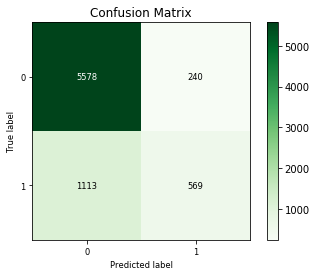

-------------------------------------------------------


In [28]:
modelo_procesar('log_reg', LogisticRegression(max_iter=10000, random_state=SEED, solver='lbfgs') )

-------------------------------------------------------
[0.32323232 0.31685166 0.31180626 0.28254289 0.3148335 ]
rf_classifer: Avg CV recall using all features on training data: 0.3099
rf_classifer: Recall w/all features on test data 0.3086:
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      5818
           1       0.63      0.31      0.41      1682

    accuracy                           0.80      7500
   macro avg       0.73      0.63      0.65      7500
weighted avg       0.78      0.80      0.78      7500

[[5512  306]
 [1163  519]]


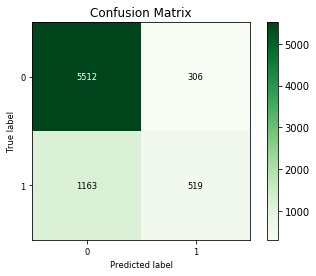

-------------------------------------------------------


In [29]:
modelo_procesar('rf_classifer', RandomForestClassifier(random_state=SEED, n_estimators=10))

-------------------------------------------------------
[0.37979798 0.2209889  0.35116044 0.25832492 0.35620585]
bayes: Avg CV recall using all features on training data: 0.3133
bayes: Recall w/all features on test data 0.3383:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5818
           1       0.67      0.34      0.45      1682

    accuracy                           0.81      7500
   macro avg       0.75      0.64      0.67      7500
weighted avg       0.80      0.81      0.79      7500

[[5532  286]
 [1113  569]]


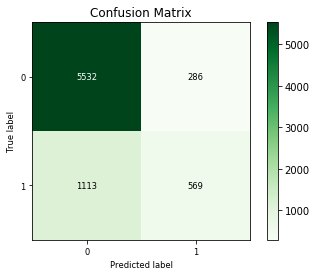

-------------------------------------------------------


In [30]:
modelo_procesar('bayes', GaussianNB())

-------------------------------------------------------
[0.37979798 0.35116044 0.35116044 0.33400605 0.35116044]
gbc: Avg CV recall using all features on training data: 0.3535
gbc: Recall w/all features on test data 0.3347:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5818
           1       0.70      0.33      0.45      1682

    accuracy                           0.82      7500
   macro avg       0.77      0.65      0.67      7500
weighted avg       0.80      0.82      0.79      7500

[[5581  237]
 [1119  563]]


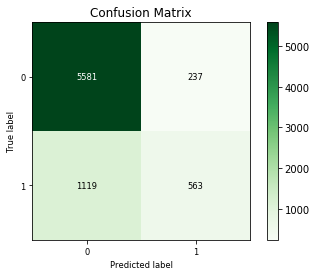

-------------------------------------------------------


In [31]:
modelo_procesar('gbc', GradientBoostingClassifier())

# MODELOS BALANCEADOS CON "SMOTE"

In [32]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

In [33]:
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=SEED)
X_train_std_sm, y_train_sm = sm.fit_resample(X_train_std_df, y_train)

model_1_train = []
model_1_test = []

In [34]:


def modelo_procesar_sm(name, classifier):
    
  
    print('-------------------------------------------------------')
        
    pipeline = make_pipeline(sm, classifier)
    scores = cross_val_score(pipeline, X_train_std_df, y_train, cv=5, scoring='recall')
    model_1_train.append(scores.mean().round(4))
    print(scores)
    print('{}: Avg CV Recall w/All Reatures: {}'.format(name, scores.mean().round(4)))
    
    classifier.fit(X_train_std_sm, y_train_sm)
    y_preds = classifier.predict(X_test_std_df)
    test_recall = recall_score(y_test, y_preds)
    test_class = classification_report(y_test, y_preds)
    cnf_matrix = confusion_matrix(y_test, y_preds)
    model_1_test.append(test_recall.round(4))
    print('{}: Recall w/All Features on test data {}:'.format(name, test_recall.round(4)))
    print(test_class)
    print(cnf_matrix)
    print('-------------------------------------------------------')
    
    label_encoder = LabelEncoder()
    label = credit['Default_Payment']

    label = label_encoder.fit_transform(label)
    
    y_test_l = label_encoder.inverse_transform(y_test)
    y_preds_l = label_encoder.inverse_transform(y_preds)

    skplt.metrics.plot_confusion_matrix(y_test_l,y_preds_l,text_fontsize="small",cmap='Greens',figsize=(6,4))
    plt.show()
    
    
    print('-------------------------------------------------------')


-------------------------------------------------------
[0.5969697  0.57820383 0.56407669 0.57719475 0.56205853]
log_reg: Avg CV Recall w/All Reatures: 0.5757
log_reg: Recall w/All Features on test data 0.5755:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      5818
           1       0.51      0.58      0.54      1682

    accuracy                           0.78      7500
   macro avg       0.69      0.71      0.70      7500
weighted avg       0.79      0.78      0.78      7500

[[4883  935]
 [ 714  968]]
-------------------------------------------------------


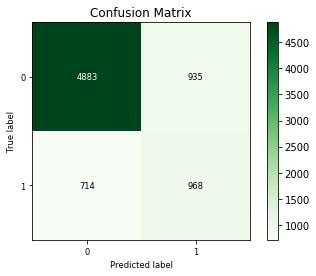

-------------------------------------------------------


In [35]:
modelo_procesar_sm('log_reg', LogisticRegression(max_iter=10000, random_state=SEED, solver='lbfgs') )

-------------------------------------------------------
[0.42929293 0.41876892 0.42986882 0.41170535 0.42684157]
rf_classifer: Avg CV Recall w/All Reatures: 0.4233
rf_classifer: Recall w/All Features on test data 0.4251:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      5818
           1       0.54      0.43      0.47      1682

    accuracy                           0.79      7500
   macro avg       0.69      0.66      0.67      7500
weighted avg       0.77      0.79      0.78      7500

[[5204  614]
 [ 967  715]]
-------------------------------------------------------


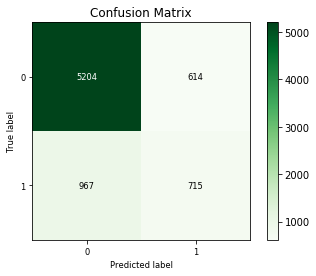

-------------------------------------------------------


In [36]:
modelo_procesar_sm('rf_classifer', RandomForestClassifier(random_state=SEED, n_estimators=10))

-------------------------------------------------------
[0.51212121 0.27951564 0.45610494 0.35015136 0.44298688]
bayes: Avg CV Recall w/All Reatures: 0.4082
bayes: Recall w/All Features on test data 0.437:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      5818
           1       0.61      0.44      0.51      1682

    accuracy                           0.81      7500
   macro avg       0.73      0.68      0.69      7500
weighted avg       0.79      0.81      0.80      7500

[[5339  479]
 [ 947  735]]
-------------------------------------------------------


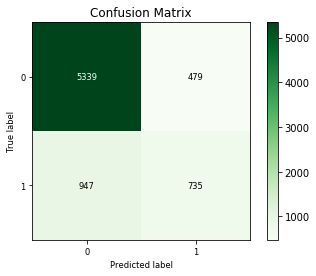

-------------------------------------------------------


In [37]:
modelo_procesar_sm('bayes', GaussianNB())

-------------------------------------------------------
[0.52828283 0.48738648 0.48234107 0.49949546 0.48940464]
gbc: Avg CV Recall w/All Reatures: 0.4974
gbc: Recall w/All Features on test data 0.5:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      5818
           1       0.58      0.50      0.54      1682

    accuracy                           0.81      7500
   macro avg       0.72      0.70      0.71      7500
weighted avg       0.80      0.81      0.80      7500

[[5198  620]
 [ 841  841]]
-------------------------------------------------------


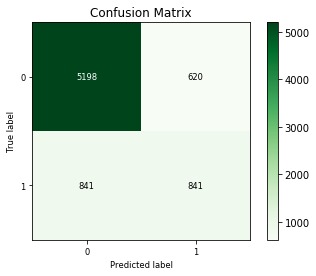

-------------------------------------------------------


In [38]:
modelo_procesar_sm('gbc', GradientBoostingClassifier())

In [39]:
rf_selector = RandomForestClassifier(n_estimators=100, random_state=SEED, n_jobs=-1)
rf_selector.fit(X_train_std, y_train)
feature_imp = pd.Series(rf_selector.feature_importances_, index=X_train_std_df.columns).sort_values(ascending=False)
feature_imp[:35]

LIMIT_BAL                0.066455
BILL_AMT1                0.058549
BILL_AMT2                0.052872
PAY_0_D2                 0.052561
BILL_AMT3                0.051267
BILL_AMT4                0.049468
BILL_AMT6                0.049047
PAY_AMT1                 0.048731
BILL_AMT5                0.048295
PAY_AMT2                 0.045911
PAY_AMT3                 0.044167
PAY_AMT6                 0.043903
PAY_AMT5                 0.042233
PAY_AMT4                 0.041306
PAY_2_D2                 0.025423
PAY_3_D2                 0.018785
PAY_4_D2                 0.016652
PAY_0_RC                 0.015076
EDUCATION_UNIVERSITY     0.010581
PAY_6_D2                 0.010207
EDUCATION_GRADUATE       0.009916
MARRIAGE_MARRIAGE        0.009855
MARRIAGE_SINGLE          0.009798
SEX_MALE                 0.009698
SEX_FEMALE               0.009659
AGE_44_79                0.009616
PAY_5_D2                 0.009474
AGE_32_37                0.009347
AGE_20_27                0.009110
EDUCATION_HIGH

In [40]:
sum(feature_imp[:35])

0.9237191532894962

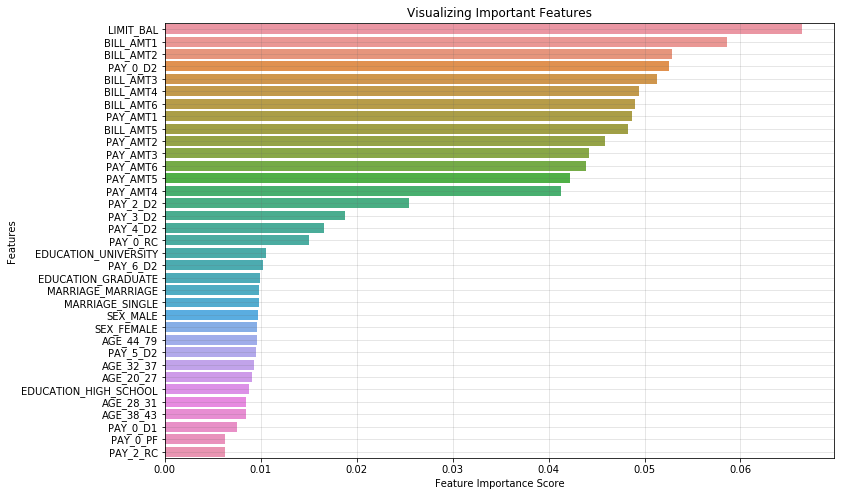

In [41]:
X_train_rf = X_train_std_df[feature_imp[:35].index]
X_test_rf = X_test_std_df[feature_imp[:35].index]
plt.figure(figsize=(12,8))
sns.barplot(x=feature_imp[0:35], y=feature_imp.index[0:35])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.grid(b=False, which='major', color='#666666', linestyle='-', alpha=0.2)
plt.show()

In [42]:
model_2_train = []
model_2_test = []

In [43]:
def modelo_procesar_features(name, classifier):
    
    print('-------------------------------------------------------')
        
        
    scores = cross_val_score(classifier, X_train_rf, y_train, cv=5, scoring='recall')
    model_2_train.append(scores.mean().round(3))
    print(scores)
    print('{}: Avg CV Recall on RF Features: {}'.format(name, scores.mean().round(3)))
    
    classifier.fit(X_train_rf, y_train)
    y_preds = classifier.predict(X_test_rf)
    test_recall = recall_score(y_test, y_preds, average='binary')
    test_class = classification_report(y_test, y_preds)
    cnf_matrix = confusion_matrix(y_test, y_preds)
    model_2_test.append(test_recall.round(3))
    print('{}: Recall w/RF features on test data {}:'.format(name, test_recall.round(3)))
    
    
    print(test_class)
    print(cnf_matrix)

    
    label_encoder = LabelEncoder()
    label = credit['Default_Payment']

    label = label_encoder.fit_transform(label)
    
    y_test_l = label_encoder.inverse_transform(y_test)
    y_preds_l = label_encoder.inverse_transform(y_preds)

    skplt.metrics.plot_confusion_matrix(y_test_l,y_preds_l,text_fontsize="small",cmap='Greens',figsize=(6,4))
    plt.show()
    
    
    print('-------------------------------------------------------')

-------------------------------------------------------
[0.35555556 0.32189707 0.34409687 0.31584258 0.31584258]
log_reg: Avg CV Recall on RF Features: 0.331
log_reg: Recall w/RF features on test data 0.316:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5818
           1       0.70      0.32      0.43      1682

    accuracy                           0.82      7500
   macro avg       0.76      0.64      0.66      7500
weighted avg       0.80      0.82      0.79      7500

[[5585  233]
 [1151  531]]


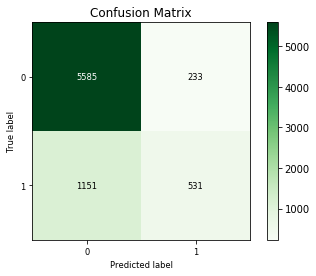

-------------------------------------------------------


In [44]:
modelo_procesar_features('log_reg', LogisticRegression(max_iter=10000, random_state=SEED, solver='lbfgs') )

-------------------------------------------------------
[0.2989899  0.29566095 0.32189707 0.2926337  0.29969728]
rf_classifer: Avg CV Recall on RF Features: 0.302
rf_classifer: Recall w/RF features on test data 0.31:
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      5818
           1       0.63      0.31      0.41      1682

    accuracy                           0.80      7500
   macro avg       0.73      0.63      0.65      7500
weighted avg       0.78      0.80      0.78      7500

[[5507  311]
 [1161  521]]


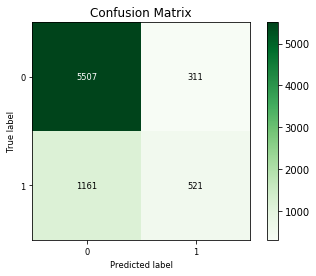

-------------------------------------------------------


In [45]:
modelo_procesar_features('rf_classifer', RandomForestClassifier(random_state=SEED, n_estimators=10))

-------------------------------------------------------
[0.61818182 0.57416751 0.55297679 0.59434914 0.57719475]
bayes: Avg CV Recall on RF Features: 0.583
bayes: Recall w/RF features on test data 0.57:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      5818
           1       0.49      0.57      0.53      1682

    accuracy                           0.77      7500
   macro avg       0.68      0.70      0.69      7500
weighted avg       0.78      0.77      0.78      7500

[[4822  996]
 [ 723  959]]


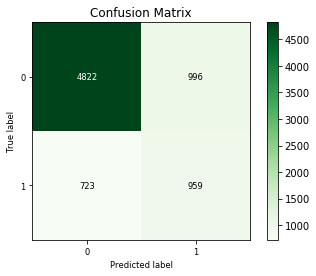

-------------------------------------------------------


In [46]:
modelo_procesar_features('bayes', GaussianNB())

-------------------------------------------------------
[0.37575758 0.34611504 0.36024218 0.32996973 0.3370333 ]
gbc: Avg CV Recall on RF Features: 0.35
gbc: Recall w/RF features on test data 0.338:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5818
           1       0.70      0.34      0.45      1682

    accuracy                           0.82      7500
   macro avg       0.76      0.65      0.67      7500
weighted avg       0.80      0.82      0.79      7500

[[5569  249]
 [1114  568]]


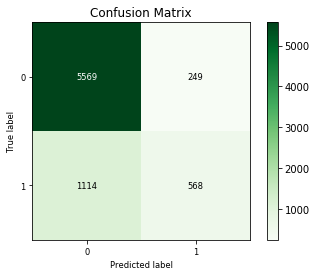

-------------------------------------------------------


In [47]:
modelo_procesar_features('gbc', GradientBoostingClassifier())

# Resumen

In [48]:
classifiers = ['Log_Regression', 'Random_Forest', 'Naive_Bayes', 'Gradient_Boosting_clf']
idx = ['All_Feat_Imbalance_Train', 'All_Feat_Imbalance_Test','All_Feat_Smote_Train',
'All_Feat_Smote_Test','RF_Imbalance_Train', 
'RF_Imbalance_Test']
combined_results = pd.DataFrame([base_model_train,base_model_test,
model_1_train, model_1_test, model_2_train,
model_2_test],
columns=classifiers, index=idx)
test_results = pd.DataFrame([base_model_test, model_1_test, model_2_test], columns=classifiers, index=idx[1:8:2])
print(test_results)

                         Log_Regression  Random_Forest  Naive_Bayes  \
All_Feat_Imbalance_Test          0.3383         0.3086       0.3383   
All_Feat_Smote_Test              0.5755         0.4251       0.4370   
RF_Imbalance_Test                0.3160         0.3100       0.5700   

                         Gradient_Boosting_clf  
All_Feat_Imbalance_Test                 0.3347  
All_Feat_Smote_Test                     0.5000  
RF_Imbalance_Test                       0.3380  


In [50]:
base_model_test

[0.3383, 0.3086, 0.3383, 0.3347]

In [51]:
model_1_test

[0.5755, 0.4251, 0.437, 0.5]

In [52]:
model_2_test

[0.316, 0.31, 0.57, 0.338]